In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [188]:
df = yf.download('AMZN', start = '2021-1-1')

[*********************100%***********************]  1 of 1 completed


In [189]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,3275.000000,3282.919922,3241.199951,3256.929932,3256.929932,2957200
2021-01-04,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400
2021-01-05,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500
2021-01-06,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800
2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500
...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500


In [190]:
def macd(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('Indicators added!')

In [191]:
macd(df)

Indicators added!


In [192]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2020-12-31,3275.000000,3282.919922,3241.199951,3256.929932,3256.929932,2957200,3256.929932,3256.929932,0.000000,0.000000
2021-01-04,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400,3218.850739,3220.427983,-1.577245,-0.876247
2021-01-05,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500,3218.717752,3219.738874,-1.021122,-0.935622
2021-01-06,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800,3193.358226,3196.994455,-3.636229,-1.850462
2021-01-07,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500,3184.881756,3188.916181,-4.034425,-2.500142
...,...,...,...,...,...,...,...,...,...,...
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,3229.719971,4389900,3323.752787,3373.869433,-50.116646,-34.950492
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3307.239990,3140300,3321.212356,3368.933919,-47.721562,-37.504706
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,3304.139893,2501500,3318.585824,3364.134361,-45.548538,-39.113472


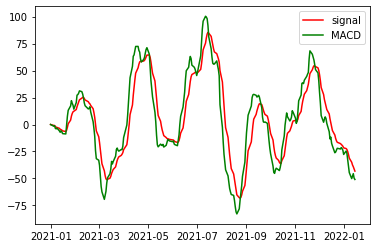

In [193]:
plt.plot(df.signal, label='signal', color='red')
plt.plot(df.MACD, label='MACD',color='green')
plt.legend()
plt.show()

In [194]:
Buy, Sell = [], []

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [195]:
Buy

[12, 48, 78, 108, 126, 163, 198, 213]

In [196]:
Sell

[27, 77, 84, 125, 135, 180, 211, 228]

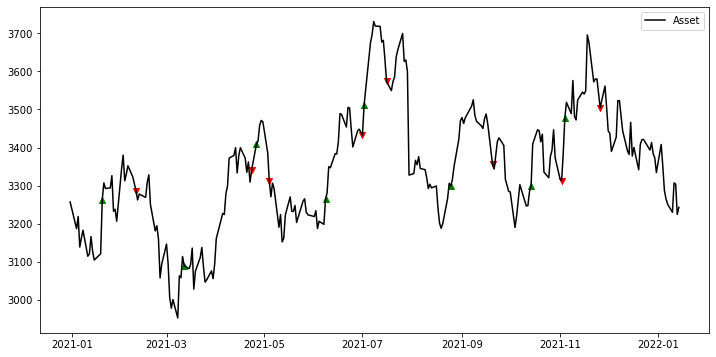

In [197]:
plt.figure(figsize=(12,6))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red')
plt.plot(df.Close, label='Asset', color='black')
plt.legend()
plt.show()

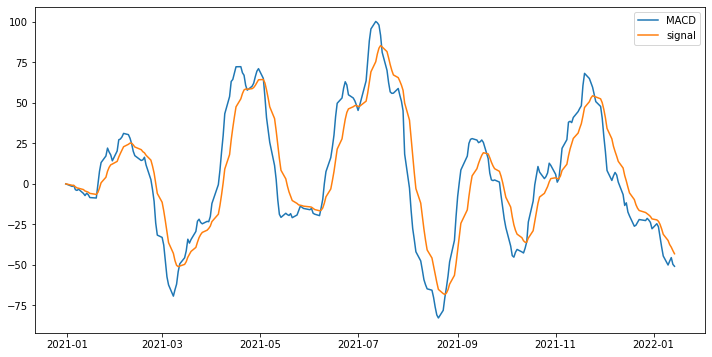

In [198]:
plt.figure(figsize=(12,6))
plt.plot(df.MACD,label='MACD')
plt.plot(df.signal,label='signal')
plt.legend()

# PnL Statement

In [199]:
Buy

[12, 48, 78, 108, 126, 163, 198, 213]

In [200]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [201]:
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [202]:
Buyprices

Date
2021-01-21    3293.000000
2021-03-15    3074.570068
2021-04-27    3443.469971
2021-06-09    3272.870117
2021-07-06    3530.110107
2021-08-26    3299.000000
2021-10-15    3311.419922
2021-11-05    3477.000000
Name: Open, dtype: float64

In [203]:
Sellprices

Date
2021-02-11    3292.000000
2021-04-26    3348.000000
2021-05-05    3338.860107
2021-07-02    3451.639893
2021-07-19    3532.580078
2021-09-21    3375.000000
2021-11-03    3309.000000
2021-11-29    3547.639893
Name: Open, dtype: float64

In [204]:
if Sellprices.index[0] < Buyprices.index[0]:
    Sellprices = Sellprices[1:]
elif Buyprices.index[-1] > Sellprices.index[-1]:
    Buyprices = Buyprices[:-1]

In [205]:
profits = []
profitsrel = []

for i in range(len(Sellprices)):
    profits.append((Sellprices[i]-Buyprices[i]))
    profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])

In [206]:
strprofitrel = str(round(sum(profitsrel*100),2))
strprofit = str(round(sum(profits),2))

bnhprofit = df.Open[-1] - df.Open[0]
relbnhprofit = (df.Open[-1] - df.Open[0])/df.Open[0]

print('You made: $' + strprofit + ' in profit!')
print('You made: ' + strprofitrel + '% in profit!')

print('BnH : $' + str(bnhprofit) + ' in profit!')
print('BnH Rel: ' + str(relbnhprofit*100) + '% in profit!')


You made: $493.28 in profit!
You made: 15.62% in profit!
BnH : $-72.0 in profit!
BnH Rel: -2.198473282442748% in profit!


In [207]:
[i*100 for i in profitsrel]

[-0.03036744609778318,
 8.893273711811364,
 -3.037920010084758,
 5.462171396653178,
 0.06996865899259101,
 2.303728402546226,
 -0.07307807321608992,
 2.0316333787208802]

# Conclusion

We made a little money but not too much. Buying and Holding would have been more profitable...